# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [19]:
df = pd.read_csv('../data/states_edu.csv')
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [20]:

df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['ENROLL_12'], inplace=True)
df.dropna(subset=['ENROLL_PRIMARY'], inplace=True)
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)


df.dropna()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: 12 grade enrollment

How many years of data are logged in our dataset? 

In [23]:
#20 years
df["YEAR"].nunique()

20

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [22]:
# MICHIGAN                117139.750000
# OHIO                    123650.000000
#Ohio has higher 12th grade enrollment on average
df.groupby("STATE")["ENROLL_12"].mean()

STATE
ALABAMA                  46276.50
ALASKA                    9227.55
ARIZONA                  70422.35
ARKANSAS                 30175.55
CALIFORNIA              432959.65
COLORADO                 53679.35
CONNECTICUT              37821.05
DELAWARE                  7777.70
DISTRICT_OF_COLUMBIA      3222.40
FLORIDA                 157512.15
GEORGIA                  90135.20
HAWAII                   10729.60
IDAHO                    18621.85
ILLINOIS                139634.45
INDIANA                  69640.40
IOWA                     37134.65
KANSAS                   32934.30
KENTUCKY                 41450.85
LOUISIANA                40316.30
MAINE                    14266.55
MARYLAND                 56847.25
MASSACHUSETTS            64495.25
MICHIGAN                112641.45
MINNESOTA                70497.10
MISSISSIPPI              27687.90
MISSOURI                 62177.80
MONTANA                  10745.00
NEBRASKA                 22149.65
NEVADA                   23983.00
NEW_HAMP

Find the average for your outcome score across all states in 2019

In [7]:
# 12th grade enrollment is only recorded until 2015, very few data are recorded to 2019.
df[df["YEAR"]==2019]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [8]:
df.groupby("STATE")["ENROLL_12"].max()

STATE
ALABAMA                  52320.0
ALASKA                   10092.0
ARIZONA                  86960.0
ARKANSAS                 32881.0
CALIFORNIA              498403.0
COLORADO                 66244.0
CONNECTICUT              41381.0
DELAWARE                  9001.0
DISTRICT_OF_COLUMBIA      4002.0
FLORIDA                 197881.0
GEORGIA                 111538.0
HAWAII                   11326.0
IDAHO                    21084.0
ILLINOIS                148457.0
INDIANA                  77503.0
IOWA                     39114.0
KANSAS                   33829.0
KENTUCKY                 44668.0
LOUISIANA                42432.0
MAINE                    16322.0
MARYLAND                 61767.0
MASSACHUSETTS            71002.0
MICHIGAN                126380.0
MINNESOTA                74749.0
MISSISSIPPI              29717.0
MISSOURI                 67254.0
MONTANA                  11611.0
NEBRASKA                 23597.0
NEVADA                   32940.0
NEW_HAMPSHIRE            15959.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [24]:

df["percent_expenditure_per_revenue"] = df["INSTRUCTION_EXPENDITURE"] /df["STATE_REVENUE"] 
pd.set_option('use_inf_as_na',True) 
df.dropna(subset=["percent_expenditure_per_revenue"], inplace=True)
df.head(50)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,percent_expenditure_per_revenue
255,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,...,58210.0,44272.0,472847.0,208148.0,749207.0,NaN,NaN,NaN,NaN,0.838748
256,1997_ALASKA,ALASKA,1997,128143.0,1131950.0,145563.0,692364.0,294023.0,1237103.0,651935.0,...,9954.0,7771.0,83217.0,36474.0,132123.0,NaN,NaN,NaN,NaN,0.941607
257,1997_ARIZONA,ARIZONA,1997,783552.0,4343262.0,405291.0,1907516.0,2030455.0,4432360.0,1977550.0,...,60138.0,44259.0,522450.0,217764.0,814113.0,NaN,NaN,NaN,NaN,1.036715
258,1997_ARKANSAS,ARKANSAS,1997,457349.0,2355859.0,218137.0,1387107.0,750615.0,2379496.0,1291727.0,...,36229.0,29204.0,282911.0,133449.0,456497.0,NaN,NaN,NaN,NaN,0.931238
259,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,...,412604.0,317595.0,3591033.0,1578929.0,5803887.0,NaN,NaN,NaN,NaN,0.883258
260,1997_COLORADO,COLORADO,1997,672634.0,4133275.0,205038.0,1784304.0,2143933.0,4398196.0,2188731.0,...,52632.0,39263.0,429624.0,192259.0,687167.0,NaN,NaN,NaN,NaN,1.226658
261,1997_CONNECTICUT,CONNECTICUT,1997,507838.0,4788489.0,158453.0,1719703.0,2910333.0,4642835.0,2709106.0,...,39089.0,29660.0,340533.0,140872.0,535164.0,NaN,NaN,NaN,NaN,1.575334
262,1997_DELAWARE,DELAWARE,1997,110245.0,898926.0,56722.0,575855.0,266349.0,889631.0,486550.0,...,8905.0,6741.0,70161.0,33188.0,111960.0,NaN,NaN,NaN,NaN,0.844918
264,1997_FLORIDA,FLORIDA,1997,2241298.0,14363709.0,992226.0,7022561.0,6348922.0,14564750.0,6725833.0,...,173913.0,108366.0,1451398.0,613761.0,2294077.0,NaN,NaN,NaN,NaN,0.957746
265,1997_GEORGIA,GEORGIA,1997,1346761.0,8248199.0,534963.0,4471781.0,3241455.0,8483477.0,4504165.0,...,103107.0,69355.0,870113.0,365429.0,1375980.0,NaN,NaN,NaN,NaN,1.007242


Feature engineering justification: I calculated what percentage of the state revenue goes toward education expenditure. I discovered that some rows had inf present and decided to remove all inf values as that would cause unexpected results in the analysis.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '12th Grade Enrollment Over Time')

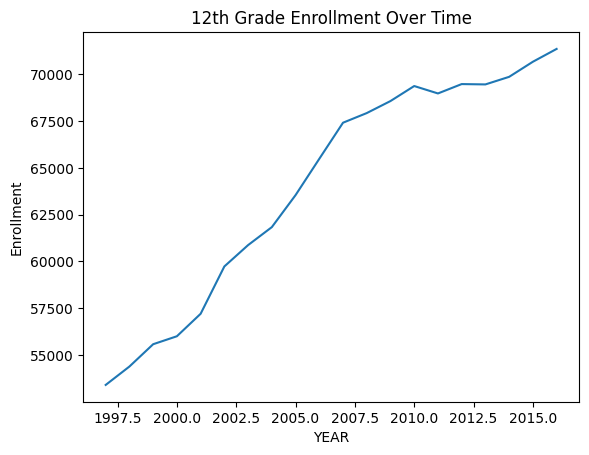

In [25]:
df.groupby('YEAR')["ENROLL_12"].mean().plot()
plt.ylabel('Enrollment')
plt.title('12th Grade Enrollment Over Time')

12th grade enrollment over time. We observe that enrollment has increased over time.

**Visualization 2**

<AxesSubplot: xlabel='INSTRUCTION_EXPENDITURE', ylabel='ENROLL_12'>

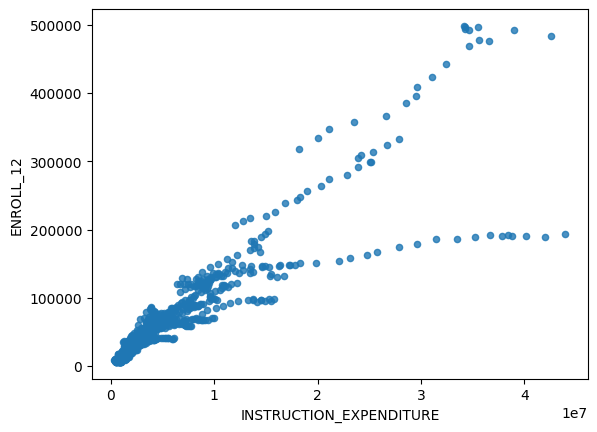

In [26]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='ENROLL_12', alpha=0.8)

Shown above is 12th grade enrollment with respect to instruction expenditure. We can observe a positive relation between instruction expenditure and 12th grade enrollment.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df[['ENROLL_PRIMARY','INSTRUCTION_EXPENDITURE']].dropna()
y = df.loc[X.index]['ENROLL_12']

In [31]:
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, '12th Grade Enrollment vs Instruction Expenditure')

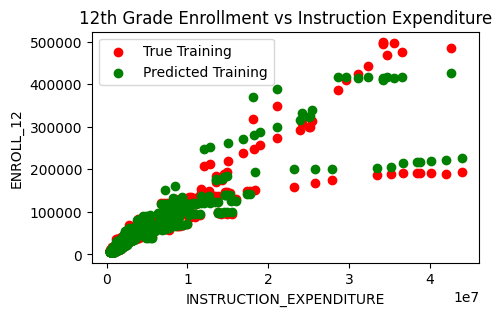

In [42]:
col_name = 'INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(5,3))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('ENROLL_12')
plt.title("12th Grade Enrollment vs Instruction Expenditure")

Text(0.5, 1.0, '12th Grade Enrollment vs Primary Enrollment')

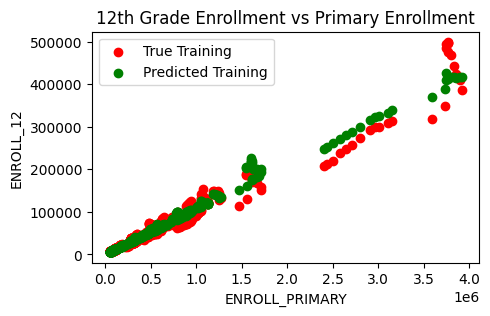

In [43]:
col_name = 'ENROLL_PRIMARY'

f = plt.figure(figsize=(5,3))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('ENROLL_12')
plt.title("12th Grade Enrollment vs Primary Enrollment")

<h2> Summary </h2>

I wanted to see how primary school enrollment and education expenditure affected 12th grade enrollment. I observed that there was a positive relationship between instruction expenditure and 12th grade enrollment. I trained a model to predict how 12th grade enrollment will be affected by primary school enrollment and instruction expenditure. I observed that both of these factors have a positive effect on 12th grade enrollment. However, it appears that the model is overfitted when observing the relationship between primary and 12th grade enrollment as the predicted training data is more "tight" or "precise" that the true data. We can conclude that investing in education will increase high school graduation. We can also use primary school enrollment data to predict if students will make it to 12th grade. 